<a href="https://colab.research.google.com/github/Navathamarkeeri/PROJECT/blob/ML/heart_data_clustering_se.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/heart_dataset_mini.csv')

In [ ]:
df.shape

(304, 3)

In [ ]:
df.head()

,Patient id,age,chol
0,1,63.0,233.0
1,2,37.0,250.0
2,3,41.0,204.0
3,4,56.0,236.0
4,5,57.0,354.0


In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.columns

Index(['Patient_id', 'age', 'chol'], dtype='object')

In [ ]:
df.dtypes

,0
Patient_id,int64
age,float64
chol,float64


In [ ]:
df.drop_duplicates(subset=['Patient_id'])

,Patient_id,age,chol
0,1,63.0,233.0
1,2,37.0,250.0
2,3,41.0,204.0
3,4,56.0,236.0
4,5,57.0,354.0
...,...,...,...
299,299,57.0,241.0
300,300,45.0,264.0
301,301,68.0,193.0
302,302,57.0,131.0


In [ ]:
df.isnull().sum()

,0
Patient_id,0
age,1
chol,1


In [ ]:
for i  in [ "age","chol"]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
print(df.shape)


(295, 3)


In [ ]:
df.isnull().sum()

,0
Patient_id,0
age,0
chol,0


In [ ]:
df = df.drop('Patient_id', axis=1)


In [ ]:
# prompt: generate code for standadization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Assuming 'df' is your DataFrame and you want to standardize numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df.head())


        age      chol
0  0.962201 -0.224765
1 -1.894973  0.151594
2 -1.455408 -0.866790
3  0.192962 -0.158349
4  0.302853  2.454028


In [ ]:
from sklearn.cluster import KMeans # Import the KMeans class correctly
from sklearn.metrics import silhouette_score
x = df # Assign df to x for clustering

model = KMeans(n_clusters=3) # Use KMeans instead of Kmeans
model = model.fit(x)
k_labels = model.labels_
k_centroid = model.cluster_centers_
print(f"Number of Cluster:{3}, silhouette_score:{silhouette_score(x, k_labels)}")

Number of Cluster:3, silhouette_score:0.3610845488241767


In [ ]:
k_labels

array([1, 0, 0, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 1,
       2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 1,
       2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1,
       1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2,
       1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 1,
       1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

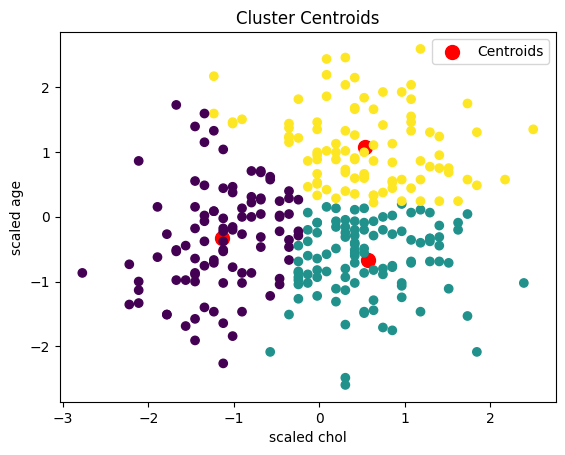

In [ ]:
# prompt: plot centroids for clusters

import matplotlib.pyplot as plt

# Assuming 'k_centroid' is a NumPy array where each row represents a centroid
# and the columns correspond to the features.

plt.scatter(k_centroid[:, 0], k_centroid[:, 1], s=100, c='red', label='Centroids')
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=k_labels, cmap='viridis')

plt.xlabel('scaled chol')
plt.ylabel('scaled age')
plt.title('Cluster Centroids')
plt.legend()
plt.show()


<ipython-input-151-f166678a8fa6>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


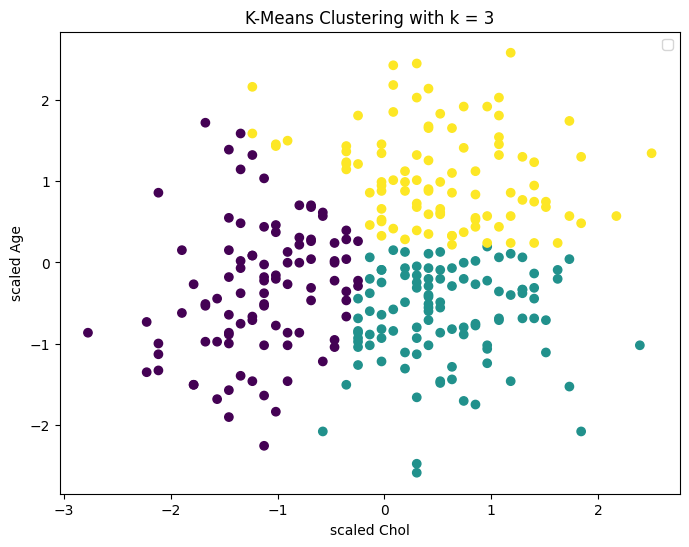

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

plt.figure(figsize=(8,6))
# Access the columns by name using .loc or .iloc
# .iloc uses integer-based indexing
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=k_labels, cmap='viridis')
# .loc uses label-based indexing
# plt.scatter(x.loc[:, 'age'], x.loc[:, 'chol'], c=k_labels, cmap='viridis')
plt.title('K-Means Clustering with k = 3') # Corrected the title
plt.xlabel('scaled Chol')
plt.ylabel('scaled Age')
plt.legend()
plt.show()

In [ ]:
df['cluster_labels']= k_labels

In [ ]:
df

,age,chol,cluster_labels
0,0.962201,-0.224765,1
1,-1.894973,0.151594,0
2,-1.455408,-0.866790,0
3,0.192962,-0.158349,1
4,0.302853,2.454028,2
...,...,...,...
299,0.302853,-0.047655,1
300,-1.015842,0.461537,0
301,1.511657,-1.110316,1
302,0.302853,-2.482921,1


In [ ]:
cluster_stats =df.groupby ('cluster_labels').agg({'age':'mean','chol':'mean'})
cluster_stats

,age,chol
cluster_labels,,
0,-1.136036,-0.321161
1,0.562406,-0.666276
2,0.531988,1.072238


In [ ]:
# prompt: classify new data points

import numpy as np

# Assuming 'model' (the trained KMeans model) and 'scaler' (the StandardScaler) are defined from the previous code

def classify_new_data(new_data_point,scaler,model):

    scalled_new_data_point = scaler.transform([new_data_point])
    predicted_cluster = model.predict(scalled_new_data_point)[0]
    return predicted_cluster

# Example usage:
new_point = [80, 200]  # Example new data point (age, chol)
predicted_cluster = classify_new_data(new_point, scaler, model) # Pass 'scaler' and 'model' to the function
print(f"The new data point belongs to cluster: {predicted_cluster}")

The new data point belongs to cluster: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Number of Cluster:2, silhouette_score:0.39432058788475


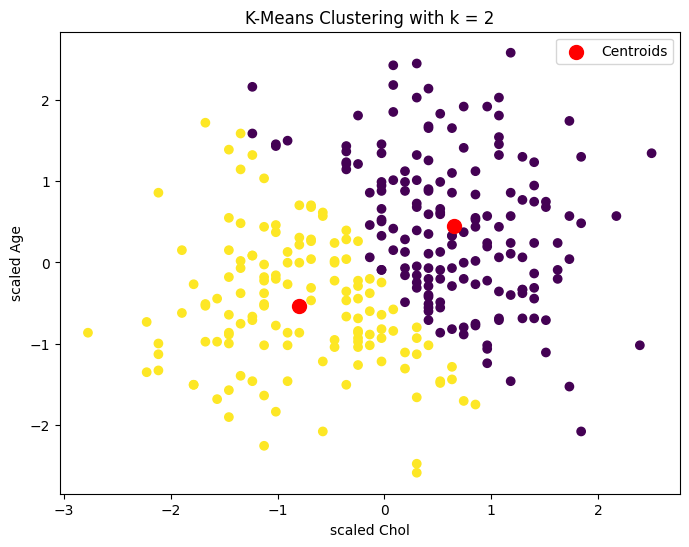

Number of Cluster:3, silhouette_score:0.4728127386842892


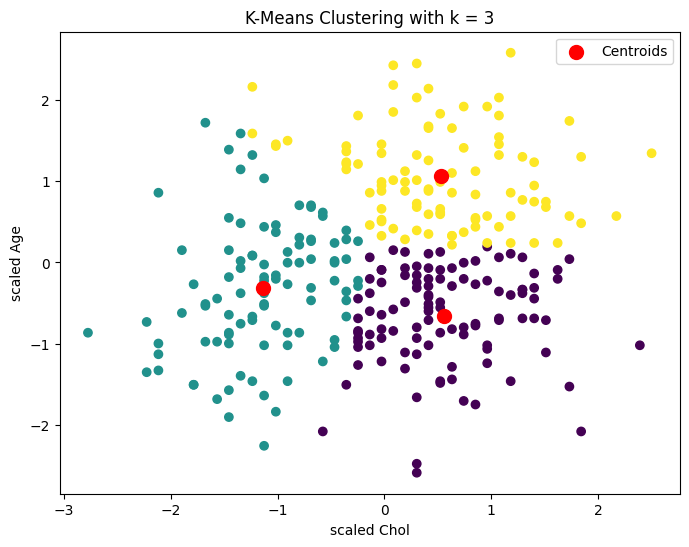

Number of Cluster:4, silhouette_score:0.3808900241032177


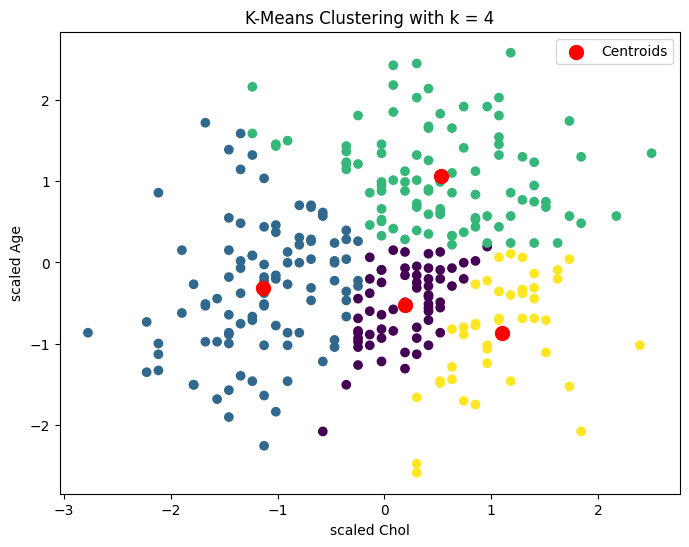

Number of Cluster:5, silhouette_score:0.3607095905432866


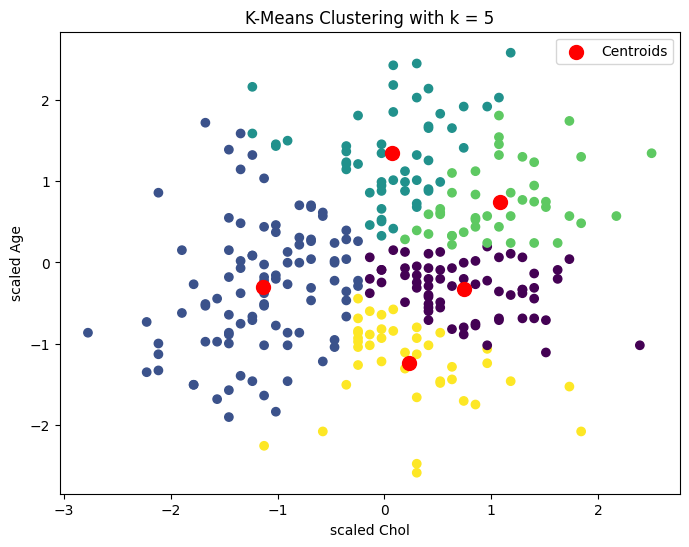

In [ ]:
# prompt: # prompt: clustering plot for the above code for each k

import matplotlib.pyplot as plt
# Assuming 'x' (scaled data), 'scaler', and 'model' are defined from the previous code

def plot_clusters(k, x, scaler, model):
    model = KMeans(n_clusters=k)
    model = model.fit(x)
    k_labels = model.labels_
    k_centroid = model.cluster_centers_
    print(f"Number of Cluster:{k}, silhouette_score:{silhouette_score(x, k_labels)}")

    plt.figure(figsize=(8, 6))
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=k_labels, cmap='viridis')
    plt.scatter(k_centroid[:, 0], k_centroid[:, 1], s=100, c='red', label='Centroids')
    plt.title(f'K-Means Clustering with k = {k}')
    plt.xlabel('scaled Chol')
    plt.ylabel('scaled Age')
    plt.legend()
    plt.show()

# Example usage for different k values
for k in range(2, 6):  # Try k values from 2 to 5
    plot_clusters(k, x, scaler, model)


In [ ]:
scaler = StandardScaler()  # Create an instance

In [ ]:
import joblib

# ... (Your code for training the KMeans model) ...

# Save the model
joblib.dump(model, 'cluster_reg_model.pkl')

['cluster_reg_model.pkl']

In [ ]:
scaler = StandardScaler()  # Create an instance

In [ ]:
import joblib
joblib.dump(model, 'cluster_reg_model.pkl') # Changed 'reg' to 'dt_model'

['cluster_reg_model.pkl']

In [ ]:
# prompt: load the saved model

import joblib

loaded_model = joblib.load('cluster_reg_model.pkl')

In [ ]:
# prompt: saved the model

import joblib

# Load the saved model
loaded_model = joblib.load('cluster_reg_model.pkl')


In [ ]:
# Example usage:
new_point = [80, 200]  # Example new data point (age, chol)

# Fit the scaler or load the fitted scaler
# If you saved the fitted scaler, load it using joblib.load
# Otherwise, fit it to your original data (df[numerical_cols])

# scaler = joblib.load('scaler.pkl')  # If you saved it
scaler.fit(df[numerical_cols])  # Fit it to your data

predicted_cluster = classify_new_data(new_point, scaler, model) # Pass 'scaler' and 'model' to the function
print(f"The new data point belongs to cluster: {predicted_cluster}")

The new data point belongs to cluster: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


In [ ]:
# ... (Load your training data into 'df' or a similar DataFrame) ...
scaler.fit(df[['age', 'chol']])  # Fit to the 'age' and 'chol' columns

StandardScaler()

In [ ]:
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler,file)

In [ ]:
streamlit_code = """
import streamlit as st
import numpy as np
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle

# Load your trained model and scaler
# Assuming the model and scaler are saved as model.pkl and scaler.pkl
loaded_model = joblib.load('cluster_reg_model.pkl')

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

st.title('New cluster prediction')
st.write('Enter the input values for Regression.')

# Input fields for features
age = st.number_input('Age', min_value=0, max_value=120, value=30)
chol = st.number_input('Cholesterol', min_value=0, value=200)

# Create a button to trigger prediction
if st.button('Predict'):
    input_data = np.array([[age, chol]])
    scaled_input = scaler.transform(input_data)
    prediction = loaded_model.predict(scaled_input)
    st.write(f'Predicted Cluster: {prediction[0]}')
"""

with open ('app.py', 'w') as f:
  f.write(streamlit_code)


In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2tqM1nLRXUjWoecw6HLvNMxNwGK_2y2Yj5pg3YiigXajAMKde")

In [ ]:
from pyngrok import ngrok
public_url =ngrok.connect('8501')
print(f"sreamlit App is live at:{public_url}")

sreamlit App is live at:NgrokTunnel: "https://6dc5-35-239-193-47.ngrok-free.app" -> "http://localhost:8501"
